## Машинное обучение 1, ПМИ ФКН ВШЭ

## Практическое домашнее задание 1

### Общая информация

Дата выдачи: 19.09.2023

Мягкий дедлайн: 23:59MSK 02.10.2023

Жесткий дедлайн: 23:59MSK 06.10.2023

### О задании

Задание состоит из двух разделов, посвященных работе с табличными данными с помощью библиотеки pandas и визуализации с помощью matplotlib. В первом разделе вам предстоит выполнить базовые задания с помощью вышеуказанных библиотек, а во втором распределить студентов по курсам. Баллы даются за выполнение отдельных пунктов. Задачи в рамках одного раздела рекомендуется решать в том порядке, в котором они даны в задании.

Задание направлено на освоение jupyter notebook (будет использоваться в дальнейших заданиях), библиотек pandas и matplotlib.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов.

Сдавать задание после жёсткого дедлайна нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

### Формат сдачи
Задания сдаются через систему Anytask. Инвайт можно получить у семинариста или ассистента. Присылать необходимо ноутбук с выполненным заданием. Сам ноутбук называйте в формате homework-practice-01-pandas-Username.ipynb, где Username — ваша фамилия.

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже.

Оценка: 10?

## 0. Введение

Сейчас мы находимся в jupyter-ноутбуке (или ipython-ноутбуке). Это удобная среда для написания кода, проведения экспериментов, изучения данных, построения визуализаций и других нужд, не связанных с написанием production-кода.

Ноутбук состоит из ячеек, каждая из которых может быть либо ячейкой с кодом, либо ячейкой с текстом размеченным и неразмеченным. Текст поддерживает markdown-разметку и формулы в Latex.

Для работы с содержимым ячейки используется *режим редактирования* (*Edit mode*, включается нажатием клавиши **Enter** после выбора ячейки), а для навигации между ячейками искользуется *командный режим* (*Command mode*, включается нажатием клавиши **Esc**). Тип ячейки можно задать в командном режиме либо с помощью горячих клавиш (**y** to code, **m** to markdown, **r** to edit raw text), либо в меню *Cell -> Cell type*.

После заполнения ячейки нужно нажать *Shift + Enter*, эта команда обработает содержимое ячейки: проинтерпретирует код или сверстает размеченный текст.

In [ ]:
# ячейка с кодом, при выполнении которой появится output
2 + 2

4

Ячейка с неразмеченным текстом.

Попробуйте создать свои ячейки, написать какой-нибудь код и текст какой-нибудь формулой.

[Здесь](https://athena.brynmawr.edu/jupyter/hub/dblank/public/Jupyter%20Notebook%20Users%20Manual.ipynb) находится <s>не</s>большая заметка о используемом языке разметки Markdown. Он позволяет:

0. Составлять упорядоченные списки
1. Выделять *текст* <s>при</s> **необходимости**
2. Добавлять [ссылки](http://imgs.xkcd.com/comics/the_universal_label.png)


* Составлять неупорядоченные списки

Делать вставки с помощью LaTex:
    
$
\left\{
\begin{array}{ll}
x = 16 \sin^3 (t) \\
y = 13 \cos (t) - 5 \cos (2t) - 2 \cos (3t) - \cos (4t) \\
t \in [0, 2 \pi]
\end{array}
\right.$

А ещё можно вставлять картинки, или гифки, или что захотите:

<img src="https://media1.tenor.com/images/9b8fbe9214504bcf6c60fe4e4f7e114e/tenor.gif?itemid=5416416" style="width: 400px">

### Google Colab

Что за колаб?

**Google Colab (Colaboratory)** это **Jupyter Notebook + Cloud + Google Drive.**

Компания Google предоставляет возможность бесплатно запускать ноутбуки (предварительно загрузив их на свой гугл-диск) прямо в облаке. При этом вам не требуется установка никаких пакетов на свою машину, а работать можно прямиком из браузера. Вот ссылка:

https://colab.research.google.com

При использовании вы увидете много сходств с jupyter ноутбуком. Одним из преимуществ является доступность GPU, соответствующую опцию можно активировать в настройках сервиса. При желании вы сможете найти в интернете много туториалов по использованию или разобраться самостоятельно =)

## 1. Табличные данные и Pandas

Pandas — удобная библиотека для работы с табличными данными в Python, если данных не слишком много и они помещаются в оперативную память вашего компьютера. Несмотря на неэффективность реализации и некоторые проблемы, библиотека стала стандартом в анализе данных.

Основной объект в pandas — это DataFrame, представляющий собой таблицу с именованными колонками различных типов, индексом (может быть многоуровневым). DataFrame можно создавать, считывая таблицу из файла или задавая вручную из других объектов.

В этой части потребуется выполнить несколько небольших заданий. Можно пойти двумя путями: сначала изучить материалы, а потом приступить к заданиям, или же разбираться "по ходу". Выбирайте сами.

Материалы:
1. [Pandas за 10 минут из официального руководства](http://pandas.pydata.org/pandas-docs/stable/10min.html)
2. [Документация](http://pandas.pydata.org/pandas-docs/stable/index.html) (стоит обращаться, если не понятно, как вызывать конкретный метод)
3. [Примеры использования функционала](http://nbviewer.jupyter.org/github/justmarkham/pandas-videos/blob/master/pandas.ipynb)

Многие из заданий можно выполнить несколькими способами. Не существуют единственно верного, но попробуйте максимально задействовать арсенал pandas и ориентируйтесь на простоту и понятность вашего кода. Мы не будем подсказывать, что нужно использовать для решения конкретной задачи, попробуйте находить необходимый функционал сами (название метода чаще всего очевидно). В помощь вам документация, поиск и stackoverflow.

In [1]:
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


<span style="color:red">Перед выполнением задания необходимо ознакомиться с первым семинаром (seminars/sem01-pandas.ipynb) </span>.

Это поможет вам получить общее понимание происходяшего и успешнее справиться с заданием.

Также успешному выполнению способствует внимательное чтение текста задания от начала до конца.

Удачи!

Скачаем подготовленные на семинаре данные:

In [3]:
!wget  -O 'end_seminar.xlsx' -q 'https://www.dropbox.com/s/f4rm8sjc3v99p0m/_end_seminar.xlsx?dl=0'

Для пользователей Windows: скачайте файл самостоятельно и поместите его в папку с тетрадкой. Или попробуйте один из следующих вариантов:

##### В первой части задания (до раздела "Распределение студентов по курсам") использование циклов запрещается и повлечет за собой снижение оценки. Использование <code>vectorize</code> и  <code>apply</code>, <code>apply_along_axis</code> крайне нежелательно.

Для каждой задачи из этого раздела вы должны написать код для получения ответа, а также дать текстовый ответ, если он предполагается.

На некоторые вопросы вы можете получить путём пристального взгляда на таблицу, но это не будет засчитываться. Вы в любом случае должны получить ответ с помощью кода.

#### 1. [0 баллов] Откройте файл с таблицей (не забудьте про её формат). Выведите последние 10 строк.

Посмотрите на данные и скажите, что они из себя представляют, сколько в таблице строк, какие столбцы? (на это не надо отвечать, просто подумайте об этом)

In [364]:
data = pd.read_excel('end_seminar.xlsx')


#### 2. [0.5 балла] Есть ли в данных пропуски? В каких колонках? Сколько их в каждой из этих колонок?

In [365]:
data.isnull().sum() #количество пропусков в каждой из колонок

timestamp          0
id                 0
rating             0
18_group         138
is_mi            343
fall_1             0
fall_2             0
fall_3             0
spring_1           0
spring_2           0
spring_3           0
is_first_time      2
percentile         0
17_group         223
blended          223
is_ml_student    304
dtype: int64

Заполните пропуски пустой строкой для строковых колонок и нулём для числовых (постарайтесь избежать перечисления названий всех столбцов).

In [369]:
data = data.fillna(0) #заменили
data[['is_first_time',"blended"]] = data[['is_first_time',"blended"]].replace(0,'')


In [368]:
data.isnull().sum() #убедились

timestamp        0
id               0
rating           0
18_group         0
is_mi            0
fall_1           0
fall_2           0
fall_3           0
spring_1         0
spring_2         0
spring_3         0
is_first_time    0
percentile       0
17_group         0
blended          0
is_ml_student    0
dtype: int64

#### 3. [0.5 балла] Посмотрите повнимательнее на колонку 'is_first_time'.

Есть ли в ней ответы "Нет"? Сколько их?

Если вы найдете повторные обращения студентов, оставьте только самую позднюю версию. В дальнейших заданиях используйте версию данных без повторов.

<i>Обращения со значением "Нет" в 'is_first_time' могут быть как повторными, так и первичными, поскольку поле заполняли сами студенты.</i>

In [370]:
len(data[data['is_first_time'] =='Нет']) #51 ответ "нет" в колонке is_first_time

51

In [371]:
data = data.drop_duplicates(subset=['rating'],  keep='last') #удалили первичные ответы студентов, заполнявших опросник повторно
data.shape

(347, 16)

#### 4. [0.5 балла] Ответьте на вопросы:
1. Сколько было заявок из групп 18-го года набора, а сколько из групп 17-го года?
2. Есть ли студенты с равными перцентилями (среди объединенных данных, ведь конкурс на каждый курс общий)?

In [372]:
print('Количество заявок из групп 18-го года набора:',(data["18_group"]>0).sum())
print('Количество заявок из групп 17-го года набора:',(data["17_group"]>0).sum())

Количество заявок из групп 18-го года набора: 213
Количество заявок из групп 17-го года набора: 134


In [373]:
counts = data['percentile'].value_counts()
counts[counts>1] #вроде только два человека с нулевым перцентилем, больше равных перцентилей нет

0.0    2
Name: percentile, dtype: int64

#### 5. [0.5 балла] Какие  blended-курсы для четверокурсников существуют? На какой blended-курс записалось наибольшее количество студентов? На каком из blended-курсов собрались студенты с самым высоким средним рейтингом (выведите этот курс и количество студентов на нем)?

In [374]:
data.blended.value_counts() # DevOps - самый популярный blended курс, большая часть студентов не записывалась на blended курс

                                         213
DevOps                                    87
Соревновательный анализ данных            32
Введение в дифференциальную геометрию     15
Name: blended, dtype: int64

In [375]:
bl = data[data['blended'] !='']
bl=bl.loc[:,['percentile','blended']].sort_values(by='percentile')
bl.groupby('blended').mean() #на диффгеом записалось меньше всего студентов и средний перцентиль самый низкий (то есть рейтинг в среднем выше)


,percentile
blended,
DevOps,0.502499
Введение в дифференциальную геометрию,0.343961
Соревновательный анализ данных,0.537817


#### 6. [1 балл] Выясните, есть ли студенты с абсолютно одинаковыми предпочтениями по всем курсам.

Для этого сформируйте таблицу, где для каждого возможного набора курсов посчитано количество студентов, выбравших такой набор, и оставьте только строки где это количество больше 1.

В данном случае набор курсов задается упорядоченным множеством ('fall_1', 'fall_2', 'fall_3', 'spring_1', 'spring_2', 'spring_3', 'blended'). Элемент blended будет нулевым для 3-го курса.

In [397]:
#я если честно не знаю, правильно ли я поняла задание и это ли просили вывести
pref=data.groupby(by = ['fall_1','fall_2','fall_3', 'spring_1', 'spring_2', 'spring_3', 'blended']).count()[['17_group', '18_group']]
pref[(pref['17_group']>1) | (pref['18_group'] >1)]

17_group  \
fall_1                                          fall_2                                          fall_3                                          spring_1                                           spring_2                                    spring_3                                    blended             
Statistical Learning Theory                     Анализ неструктурированных данных               Сбор и обработка данных с помощью краудсорсинга Обучение с подкреплением                           Конфликты и кооперация                      Компьютерное зрение                         DevOps          2   
Байесовские методы машинного обучения           Анализ неструктурированных данных               Глубинное обучение в обработке звука            Обучение с подкреплением                           Генеративные модели в машинном обучении     Компьютерное зрение                         DevOps          2   
                                                                                                Сбор и обработка данных с помощью краудсорсинга Обучение с подкреплением                           Компьютерное зрение                         Генеративные модели в машинном обучении     DevOps          2   
Безопасность компьютерных систем                Statistical Learning Theory                     Матричные вычисления                            Дискретная оптимизация                             Промышленное программирование на языке Java Дополнительные главы прикладной статистики                  3   
                                                Высокопроизводительные вычисления               Анализ неструктурированных данных               Проектирование и разработка высоконагруженных с... Методы сжатия и передачи медиаданных        Конфликты и кооперация                      DevOps          2   
                                                                                                Язык SQL                                        Компьютерные сети                                  Промышленное программирование на языке Java Дискретная оптимизация                                      3   
                                                                                                                                                Промышленное программирование на языке Java        Компьютерные сети                           Системы баз данных                                          2   
                                                Матричные вычисления                            Моделирование временных рядов                   Промышленное программирование на языке Java        Компьютерные сети                           Дискретная оптимизация                                      2   
                                                Сбор и обработка данных с помощью краудсорсинга Матричные вычисления                            Компьютерные сети                                  Промышленное программирование на языке Java Анализ данных в бизнесе                                     2   
                                                Теория баз данных                               Язык SQL                                        Машинное обучение 2                                Компьютерные сети                           Промышленное программирование на языке Java                 2   
Высокопроизводительные вычисления               Безопасность компьютерных систем                Сбор и обработка данных с помощью краудсорсинга Проектирование и разработка высоконагруженных с... Методы сжатия и передачи медиаданных        Компьютерное зрение                         DevOps          2   
                                                Сбор и обработка данных с помощью краудсорсинга Моделирование временных рядов                   Проектирование и разработка высоконагруженных с... Методы сжатия и передачи медиаданных        Методы сжатия и передачи медиаданных        DevOps          2   
Моделирование временных рядов       

In [398]:
same = data.loc[:,['fall_1', 'fall_2', 'fall_3', 'spring_1', 'spring_2', 'spring_3','blended']] #но одинаковые предпочтения (с учетом приоритетов - есть)
duplicateRows = same[same.duplicated(['fall_1', 'fall_2', 'fall_3', 'spring_1', 'spring_2', 'spring_3','blended'])]
duplicateRows


,fall_1,fall_2,fall_3,spring_1,spring_2,spring_3,blended
40,Безопасность компьютерных систем,Высокопроизводительные вычисления,Язык SQL,Компьютерные сети,Промышленное программирование на языке Java,Дискретная оптимизация,
72,Безопасность компьютерных систем,Высокопроизводительные вычисления,Язык SQL,Компьютерные сети,Промышленное программирование на языке Java,Дискретная оптимизация,
84,Безопасность компьютерных систем,Statistical Learning Theory,Матричные вычисления,Дискретная оптимизация,Промышленное программирование на языке Java,Дополнительные главы прикладной статистики,
88,Безопасность компьютерных систем,Statistical Learning Theory,Матричные вычисления,Дискретная оптимизация,Промышленное программирование на языке Java,Дополнительные главы прикладной статистики,
105,Моделирование временных рядов,Сбор и обработка данных с помощью краудсорсинга,Безопасность компьютерных систем,Компьютерные сети,Дополнительные главы прикладной статистики,Системы баз данных,
110,Сбор и обработка данных с помощью краудсорсинга,Язык SQL,Теория баз данных,Промышленное программирование на языке Java,Машинное обучение 2,Компьютерные сети,
133,Безопасность компьютерных систем,Сбор и обработка данных с помощью краудсорсинга,Матричные вычисления,Компьютерные сети,Промышленное программирование на языке Java,Анализ данных в бизнесе,
171,Безопасность компьютерных систем,Высокопроизводительные вычисления,Язык SQL,Промышленное программирование на языке Java,Компьютерные сети,Системы баз данных,
178,Безопасность компьютерных систем,Матричные вычисления,Моделирование временных рядов,Промышленное программирование на языке Java,Компьютерные сети,Дискретная оптимизация,
185,Язык SQL,Высокопроизводительные вычисления,Теория баз данных,Компьютерные сети,Промышленное программирование на языке Java,Дискретная оптимизация,


#### 7. [0.5 балла] Найдите курсы по выбору, на которые записывались как студенты 18-го года набора, так и студенты 17-го года.

In [416]:
# cour17 = list(data[(data['17_group']>0)][['fall_1']].unique())
cour17= set(pd.unique(data[data['17_group']>0][['fall_1', 'fall_2', 'fall_3']]. values.ravel())) #все курсы

data[(data['17_group']>0)][['fall_1']].value_counts() #всего было представлено 9 курсов на выбор для студентов 17-года
cour17

{'Statistical Learning Theory',
 'Анализ неструктурированных данных',
 'Байесовские методы машинного обучения',
 'Безопасность компьютерных систем',
 'Высокопроизводительные вычисления',
 'Глубинное обучение в обработке звука',
 'Моделирование временных рядов',
 'Принятие решений в условиях риска и неопределённости',
 'Сбор и обработка данных с помощью краудсорсинга'}

In [415]:
data[(data['18_group']>0)][['fall_1']].value_counts() #также 9 курсов
cour18= set(pd.unique(data[data['18_group']>0][['fall_1', 'fall_2', 'fall_3']]. values.ravel())) #все курсы
cour18

{'Statistical Learning Theory',
 'Безопасность компьютерных систем',
 'Высокопроизводительные вычисления',
 'Матричные вычисления',
 'Моделирование временных рядов',
 'Принятие решений в условиях риска и неопределённости',
 'Сбор и обработка данных с помощью краудсорсинга',
 'Теория баз данных',
 'Язык SQL'}

In [417]:
common = set(cour17).intersection(cour18) #курсы, которые были доступны как для 17-го года, так и для 18-го
common

{'Statistical Learning Theory',
 'Безопасность компьютерных систем',
 'Высокопроизводительные вычисления',
 'Моделирование временных рядов',
 'Принятие решений в условиях риска и неопределённости',
 'Сбор и обработка данных с помощью краудсорсинга'}

Методом исключения найдите курсы, которые предлагались только студентам 18-го года и только студентам 17-го года.

In [418]:
cour17.symmetric_difference(cour18)

{'Анализ неструктурированных данных',
 'Байесовские методы машинного обучения',
 'Глубинное обучение в обработке звука',
 'Матричные вычисления',
 'Теория баз данных',
 'Язык SQL'}

### Визуализации и matplotlib

При работе с данными часто неудобно делать какие-то выводы, если смотреть на таблицу и числа в частности, поэтому важно уметь визуализировать данные. Здесь будут описаны ключевые правила оформления графиков для **всех** домашних заданий.

У matplotlib, конечно же, есть [документация](https://matplotlib.org/users/index.html) с большим количеством [примеров](https://matplotlib.org/examples/), но для начала достаточно знать про несколько основных типов графиков:
- plot — обычный поточечный график, которым можно изображать кривые или отдельные точки;
- hist — гистограмма, показывающая распределение некоторой величины;
- scatter — график, показывающий взаимосвязь двух величин;
- bar — столбцовый график, показывающий взаимосвязь количественной величины от категориальной.

В этом задании вы попробуете построить один из них. Не забывайте про базовые принципы построения приличных графиков:
- оси должны быть подписаны, причём не слишком мелко;
- у графика должно быть название;
- если изображено несколько графиков, то необходима поясняющая легенда;
- все линии на графиках должны быть чётко видны (нет похожих цветов или цветов, сливающихся с фоном);
- если отображена величина, имеющая очевидный диапазон значений (например, проценты могут быть от 0 до 100), то желательно масштабировать ось на весь диапазон значений (исключением является случай, когда вам необходимо показать малое отличие, которое незаметно в таких масштабах);
- сетка на графике помогает оценить значения в точках на глаз, это обычно полезно, поэтому лучше ее отрисовывать;
- если распределение на гистограмме имеет тяжёлые хвосты, лучше использовать логарифмическую шкалу.

Еще одна билиотека для визуализации: [seaborn](https://jakevdp.github.io/PythonDataScienceHandbook/04.14-visualization-with-seaborn.html) (обычно сокращается до sns). Это настройка над matplotlib, иногда удобнее и красивее делать визуализации через неё.

**5 пунктов после которых ваши графики не будут прежними:**
- для красивой картинки <code>%config InlineBackend.figure_format = 'retina'</code>
- задаем размер (почти) всех графиков (можно выбрать другие значения) <code>plt.rcParams['figure.figsize'] = 8, 5</code>
- размер шрифта подписей графиков <code>plt.rcParams['font.size'] = 12</code>
- формат в котором сохраняется изображение <code>mpl.rcParams['savefig.format'] = 'pdf'</code>
- sns – seaborn, добавляет решетку <code>sns.set_style('darkgrid')</code>

Добавьте эти функции в ячейку ниже. Каждый график все равно придется настраивать отдельно, но указанные строчки позволят значительно упростить процесс.  

In [419]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

%config InlineBackend.figure_format = 'retina'
plt.rcParams['figure.figsize'] = 8, 5
plt.rcParams['font.size'] = 12
mpl.rcParams['savefig.format'] = 'pdf'
sns.set_style('darkgrid')

#### 8. [0.5 балла] Постройте график средних рейтингов по дням получения ответов (bar plot).

In [420]:
days = pd.to_datetime(data.timestamp).dt.date.to_frame()
days

,timestamp
0,2020-05-15
1,2020-05-15
2,2020-05-15
3,2020-05-15
4,2020-05-15
...,...
356,2020-05-19
357,2020-05-19
358,2020-05-20
359,2020-05-23


In [421]:
rate=data.rating.to_frame()
mean_for_day_frame = days.join(rate)
all = mean_for_day_frame.groupby('timestamp')['rating'].mean().to_frame()
all #средний рейтинг по дням

,rating
timestamp,
2020-05-14,1160.277778
2020-05-15,719.866667
2020-05-16,736.400000
2020-05-17,915.027027
2020-05-18,827.352679
2020-05-19,761.142857
2020-05-20,689.500000
2020-05-21,584.000000
2020-05-23,1080.500000


In [422]:
mean_for_day_frame['timestamp'].value_counts()

2020-05-18    224
2020-05-17     37
2020-05-15     30
2020-05-14     18
2020-05-16     15
2020-05-19     14
2020-05-20      4
2020-05-24      2
2020-05-23      2
2020-05-21      1
Name: timestamp, dtype: int64

Сохраните график в формате pdf (так он останется векторизованным).

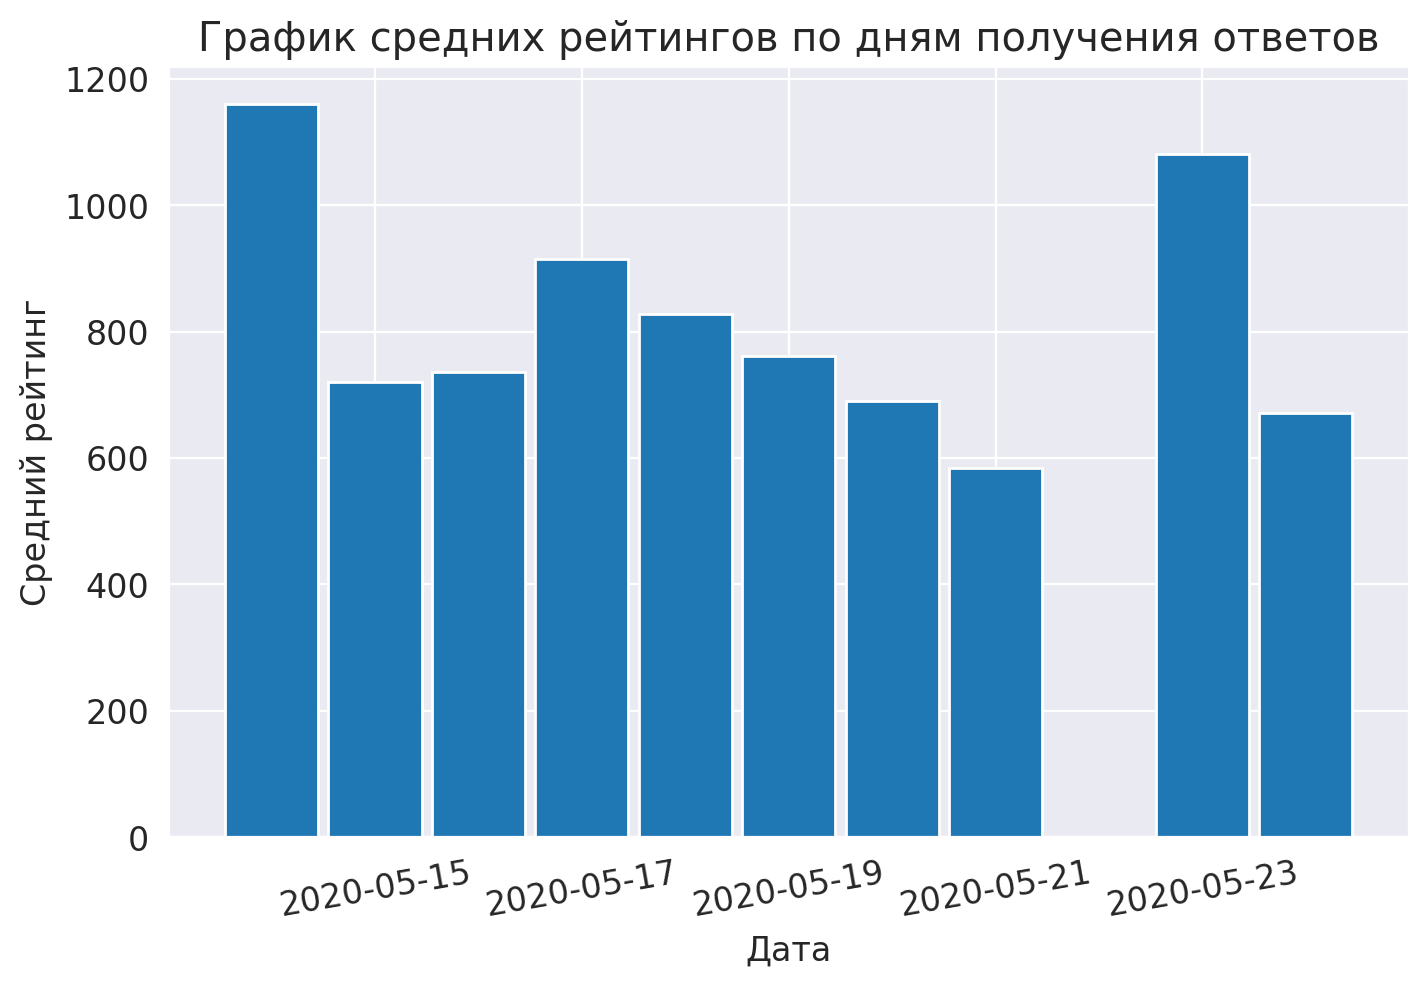

In [423]:
plt.bar(all.index, all['rating'],width=0.9)
plt.xlabel('Дата')
plt.ylabel('Средний рейтинг')
plt.xticks (rotation= 10 )
plt.title('График средних рейтингов по дням получения ответов')
plt.savefig('barplot.pdf', bbox_inches='tight')
plt.show();

### 2. Распределение студентов по курсам.

<span style="color:red">!!!ВНИМАТЕЛЬНО ИЗУЧИТЕ ТЕКСТ НИЖЕ!!!</span>.

<span style="color:orange">Если во время выполнения заданий у вас вознинут вопросы -- еще раз перечитайте текст целиком, скорее всего ответы уже содержатся в нем.</span>

Теперь вам нужно распределить студентов по осенним курсам по выбору, учитывая их предпочтения.

Алгоритм распределения студентов по курсам:
1. По умолчанию на каждой дисциплине по выбору у 3 и 4 курсов может учиться 1 группа (до 30 студентов). Исключения описаны ниже. На blended-дисциплинах для четверокурсников количество мест не ограничено.
2. Проводится первая волна отбора. Для каждой дисциплины формируется список тех, кто указал её первым приоритетом (если студент должен выбрать два курса по выбору, то для него дисциплины, которые он указал первым и вторым приоритетом, рассматриваются как дисциплины первого приоритета). Если желающих больше, чем мест, то выбирается топ по перцентилю рейтинга.
3. На дисциплинах, где остались места после первой волны, формируются списки тех, кто выбрал их вторым приоритетом и еще не прошел на необходимое количество курсов. Места заполняются лучшими по перцентилю рейтинга студентами. После этого проводится такая же процедура для дисциплин третьего приоритета.
4. Если студент не попал на необходимое количество курсов по итогам трёх волн, с ним связывается учебный офис и решает вопрос в индивидуальном порядке.

Обращаем ваше внимание на следующие детали:
- Конкурс на каждый курс общий для 3-го и 4-го курса

- По умолчанию студент выбирает один осенний и один весенний курс по выбору, а также четверокурсники выбирают один blended-курс. Студенты групп 17-го года специализаций МОП и ТИ выбирают по 2 осенних и 2 весенних курса по выбору, также студенты групп 18' специализации МИ выбирают 2 осенних курса. <i>Для студентов, которые выбирают 2 курса (например, осенних) первый приоритет — <code>fall_1</code> и <code>fall_2</code>, второй приоритет — <code>fall_3</code>. Такие студенты участвуют только в двух волнах отбора</i>.

- Студенты специализации МОП не могут выбрать весенним курсом по выбору Машинное обучение 2. **Если студент специализации МОП выбрал Машинное обучение 2, то его приоритеты сдвигаются.** Из-за совпадений первого и второго курса по выбору двигать приоритеты не надо.

- Blended-курсы не трогайте, по ним не надо распределять, на другие курсы они никак не влияют.

- Заведомо известно, что в процессе распределения не возникнет ситуации, когда на одно место претендуют студенты с одинаковым перцентилем.

- Постарайтесь воздержаться от использования циклов там, где это возможно. <i>Допустимо итерироваться по <b>курсам</b>, на которые проводится отбор, и по <b>волнам</b> отбора. Если вы придумаете, как обойтись и без этих циклов, то на усмотрение проверяющего могут быть добавлены бонусные баллы. <b>Дублирование кода не признается успешным избавлением от циклов</b></i>

- На выходе ожидается файл res_fall.csv с результатами распределения на осенние курсы по выбору. Файл должен быть следующего формата:

    * Три колонки: ID, course1, course2
    
    * Если студент не попал на курс, но должен был, то вместо названия курса в ячейке должна быть строка "???"
    
    * Если студент должен выбрать только один курс, то в колонке course2 для него должна стоять строка "-"
    
    * Если студент должен выбрать два курса по выбору, то порядок в колонках course1 и course2 не важен.
    
    * hint: для сохранения воспользуйтесь df.to_csv('solution.csv', index=None)
    

Для работы вам могут понадобиться следующие данные:

- Результаты опроса (вы уже использовали этот файл в первой части задания, но на всякий случай ссылка: https://www.dropbox.com/s/f4rm8sjc3v99p0m/_end_seminar.xlsx?dl=0)

- Соответствие номеров групп специализациям:

    * 171, 172 - МОП; 173 - ТИ; 174 — АДИС; 175, 176 — РС; 177 — АПР
    
    * У студентов 18-го года номера групп соответствуют номерам до распределения по специализациям. Это означает, что по номеру группы 18* нельзя однозначно определить специализацию студента. При этом в рамках распределения важно знать информацию только о двух из них: МОП и МИ. Эти знание можно получить из колонок 'is_ml_student
' и 'is_mi' соответственно.

- Ограничения по количеству мест на курсах по выбору:

    * Осенние: везде 30 мест, кроме Statistical Learning Theory (60 мест), Высокопроизводительных вычислений (60 мест), Анализа неструктурированных данных ($\infty$ мест)

    * Весенние: везде 30 мест, кроме Обучения с подкреплением (60 мест), Анализа данных в бизнесе (60 мест).


Кстати, убедитесь, что в данных больше нет пропусков и повторных записей.

#### 0. Проверка

Для начала давайте убедимся, что вы успешно выполнили задания первой части и проверим ваши данные на наличие пропусков и повторов:

In [424]:
assert data.shape[0] == 347, 'В таблице остались повторы или потеряны данные'

assert data.isna().sum().sum() == 0, 'В таблице остались пропуски'

Если вы не получили AssertionError, то можете продолжать.

#### 1. [1 балл] Создайте новый признак, обозначающий, сколько осенних курсов должен выбрать студент

В этом вам может помочь информация о специализации и группе стундента.

In [530]:
two_courses=  data.loc[((data['17_group'] == 171) | (data['17_group'] == 172)| (data['17_group'] == 173) | (data['is_mi'] == 1)  )] #(data['is_ml_student'] == 1)
one_courses=  data.loc[~((data['17_group'] == 171) | (data['17_group'] == 172)| (data['17_group'] == 173)  | (data['is_mi'] == 1)) ] #| (data['is_ml_student'] == 1)
one_courses['number'] = 1
two_courses['number'] = 2
df = pd.concat([one_courses, two_courses], ignore_index=True)
df.head()

<ipython-input-530-9a8a86cc031c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  one_courses['number'] = 1
<ipython-input-530-9a8a86cc031c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  two_courses['number'] = 2


,timestamp,id,rating,18_group,is_mi,fall_1,fall_2,fall_3,spring_1,spring_2,spring_3,is_first_time,percentile,17_group,blended,is_ml_student,number
0,2020-05-15 01:12:50.543,93ff79a51cd602f1dd3028ba2c129503,698,181.0,0.0,Язык SQL,Высокопроизводительные вычисления,Матричные вычисления,Дискретная оптимизация,Численные методы,Машинное обучение 2,Да,0.183857,0.0,,0.0,1
1,2020-05-15 02:46:48.066,26b01b1c4cd5656bab18d24c548834fb,647,181.0,0.0,Высокопроизводительные вычисления,Безопасность компьютерных систем,Язык SQL,Дискретная оптимизация,Численные методы,Машинное обучение 2,Нет,0.426009,0.0,,0.0,1
2,2020-05-15 03:12:41.480,30f3653fc176d54e89ac3179c455c6dd,624,185.0,0.0,Безопасность компьютерных систем,Матричные вычисления,Моделирование временных рядов,Дискретная оптимизация,Машинное обучение 2,Численные методы,Да,0.538117,0.0,,0.0,1
3,2020-05-15 04:43:08.994,1528f0eaa027580820ccf0d92a53ad68,579,182.0,0.0,Statistical Learning Theory,Высокопроизводительные вычисления,Матричные вычисления,Дискретная оптимизация,Численные методы,Машинное обучение 2,Да,0.744395,0.0,,0.0,1
4,2020-05-15 07:47:17.197,496ea4f0d4abe264b1bb1b80eb3830c5,572,183.0,0.0,Высокопроизводительные вычисления,Безопасность компьютерных систем,Теория баз данных,Компьютерные сети,Дискретная оптимизация,Численные методы,Да,0.780269,0.0,,0.0,1


Проверка:

In [462]:
col_name ='number'     # insert your new column name as str

assert(df[df['id'] == '2662600c2c37e11e62f6ee0b88452f22'][col_name] == 2).all()
assert(df[df['id'] == 'd555d2805e1d93d4f023e57dc4c8f403'][col_name] == 2).all()
assert(df[df['id'] == '8fe79f84f36e3a5d2d6745621321302c'][col_name] == 1).all()
assert(df[df['id'] == 'e4caca755ee0bdd711e18fb8084958b5'][col_name] == 1).all()

#### 2. [2 балла] Распределите студентов в соответствии с первым приоритетом

Проводится первая волна отбора. Для каждой дисциплины формируется список тех, кто указал её первым приоритетом (если студент должен выбрать два курса по выбору, то для него дисциплины, которые он указал первым и вторым приоритетом, рассматриваются как дисциплины первого приоритета). Если желающих больше, чем мест, то выбирается топ по перцентилю рейтинга.
На дисциплинах, где остались места после первой волны, формируются списки тех, кто выбрал их вторым приоритетом и еще не прошел на необходимое количество курсов. Места заполняются лучшими по перцентилю рейтинга студентами. После этого проводится такая же процедура для дисциплин третьего приоритета. Для студентов, которые выбирают 2 курса (например, осенних) первый приоритет — fall_1 и fall_2, второй приоритет — fall_3. Такие студенты участвуют только в двух волнах отбора.

In [491]:
import numpy as np

courses = pd.unique(df[['fall_1', 'fall_2', 'fall_3']]. values.ravel())
massiv, best, worst=[], [], []

for i in range(len(courses)):
  res=(df[((df['fall_1']==courses[i])  ) |
          (((df['fall_2'] )== courses[i]) & (df['number']==2)) ]).sort_values(by='percentile', ascending= True)
  if courses[i] == 'Statistical Learning Theory':
    massiv.append(res["id"].tolist()[:60] if len(res) > 60 else res["id"].tolist())
  elif courses[i] == 'Высокопроизводительные вычисления':
    massiv.append(res["id"].tolist()[:60] if len(res) > 60 else res["id"].tolist())

  elif courses[i] == 'Анализ неструктурированных данных':
    massiv.append(res["id"].tolist())

  else:
    massiv.append(res["id"].tolist()[:30] if len(res) > 30 else res["id"].tolist())


  best.append(massiv[i][0]) #здесь же сохраняю лучшего и худшего по перцентилю
  worst.append(massiv[i][-1])

df['is_first_place'] = np.nan
df['is_last_place'] = np.nan
df = df.sort_values(by='percentile',  ascending= True)
df.loc[df['id'].isin(best), 'is_first_place'] = True
df.loc[df['id'].isin(worst), 'is_last_place'] = True

Здесь для проверки приведена таблица, в которой есть 2 дополнительные колонки:
    
    1) is_first_place - является ли студент лучшим по перцентили хотя бы на одном из курсов, куда он был зачислен
    (True / NaN)
    
    2) is_last_place  - является ли студент худшим по перцентили хотя бы на одном из курсов, куда он был зачислен (True / NaN)

In [433]:
!wget  -O '2_task_check.csv' -q 'https://www.dropbox.com/s/v8o2zzq3iz5gc9w/_2_task_check.csv?dl=0'
check_df = pd.read_csv('2_task_check.csv')
check_df = check_df.sort_values(by='percentile')


После распределения студентов в соответствии с первым приоритетом добавьте в свой датафрейм аналогичные признаки и запустите проверку:

In [437]:
fir_col_name = "is_first_place"      # insert name of your new column with is_first_place as str
last_col_name = "is_last_place"   # insert name of your new column with is_last_place as str


assert((df[df[fir_col_name].isna() == False][['id']].sort_values('id').reset_index(drop=True)
        ==
        check_df[check_df['is_first_place'].isna() == False][['id']].sort_values('id').reset_index(drop=True)
       ).id.values).all()


assert((df[df[last_col_name].isna() == False][['id']].sort_values('id').reset_index(drop=True)
       ==
       check_df[check_df['is_last_place'].isna() == False][['id']].sort_values('id').reset_index(drop=True)
      ).id.values).all()

#### 3. [3 балла] Проведите все три волны отбора студентов на курсы по выбору

Для студентов, которые выбирают 2 курса (например, осенних) первый приоритет — fall_1 и fall_2, второй приоритет — fall_3. Такие студенты участвуют только в двух волнах отбора.

In [438]:
import itertools
courses = pd.unique(df[['fall_1', 'fall_2', 'fall_3']]. values.ravel()) #все курсы
massiv= [] #будет список списков айдишек
for volna in range(3):
  if volna == 0:
    for i in range(len(courses)):
      res = df[((df['fall_1'] == courses[i]))|
                     ((df['fall_2'] == courses[i]) & (df['number'] == 2))].sort_values(by='percentile', ascending=True)
      if  (courses[i] == 'Statistical Learning Theory'):
        massiv.append(res["id"].tolist()[:60] if len(res) > 60 else res["id"].tolist())
      elif (courses[i] == 'Высокопроизводительные вычисления'):
        massiv.append(res["id"].tolist()[:60] if len(res) > 60 else res["id"].tolist())

      elif (courses[i] == 'Анализ неструктурированных данных'):
          massiv.append(res["id"].tolist())

      else:
        massiv.append(res["id"].tolist()[:30] if len(res) > 30 else res["id"].tolist())

  if volna == 1:
    result_set1 = list(itertools.chain(*massiv))
    for i in range(len(courses)):
      subset = df[((df['fall_2'] == courses[i]) & (df['number'] == 1) & (~df['id'].isin(result_set1)))| #тут проверяем, чтобы люди, которые должны выбрать 1 курс, не были распределены после первой волны
                     ((df['fall_3'] == courses[i]) &(df['fall_2'] != courses[i]) & (df['fall_1'] != courses[i]) & (df['number'] == 2))].sort_values(by='percentile', ascending=True)
      res = subset[~subset['id'].apply(lambda x: result_set1.count(x) > 1)].sort_values(by='percentile', ascending=True)

      if (courses[i] == 'Statistical Learning Theory') :
        if len(massiv[i])<60:
            massiv[i].extend(res["id"].tolist()[:(60 -len(massiv[i])) ])
      elif (courses[i] == 'Высокопроизводительные вычисления'):
        if len(massiv[i])<60:
            massiv[i].extend(res["id"].tolist()[:(60 -len(massiv[i]))])

      elif (courses[i] == 'Анализ неструктурированных данных'):
        massiv[i].extend(res["id"].tolist())

      else:
        if len(massiv[i])<30:
          massiv[i].extend(res["id"].tolist()[:(30 -len(massiv[i])) ])

  if volna == 2:
    result_set2 = list(itertools.chain(*massiv))
    for i in range(len(courses)):
      res=(df[((df['fall_3']==courses[i]) & (df['number']==1)) &  (~df['id'].isin(result_set2))]).sort_values(by='percentile', ascending= True)

      if (courses[i] == 'Statistical Learning Theory'):
        if len(massiv[i])<60:
            massiv[i].extend(res["id"].tolist()[:(60 -len(massiv[i])) ])
      elif (courses[i] == 'Высокопроизводительные вычисления'):
         if len(massiv[i])<60:
            massiv[i].extend(res["id"].tolist()[:(60 -len(massiv[i])) ])

      elif (courses[i] == 'Анализ неструктурированных данных'):
        massiv[i].extend(res["id"].tolist())

      else:
         if len(massiv[i])<30:
          massiv[i].extend(res["id"].tolist()[:(30 -len(massiv[i])) ])




In [439]:
columns =['ID', 'course1', 'course2']
res_fall = pd.DataFrame(columns= columns,index =range(0,347))
res_fall['ID'] = df['id']
for i, course in enumerate(courses):
    ids_to_update = res_fall[res_fall['ID'].isin(massiv[i])]
    ids_to_update_null_course1 = ids_to_update[ids_to_update['course1'].isnull()].index
    ids_to_update_not_null_course1 = ids_to_update[ids_to_update['course1'].notnull()].index

    res_fall.loc[ids_to_update_null_course1, 'course1'] = course
    res_fall.loc[ids_to_update_not_null_course1, 'course2'] = course


In [446]:
res_fall = res_fall.fillna('???')
res_fall.loc[(res_fall['course1'] != '???') & (res_fall['course2'] == '???') & (df['number'] == 1), 'course2'] = '-'
res_fall.loc[(res_fall['course1'] == '???') & (df['number'] == 1), 'course2'] = '-' #& (df['number'] == 1),
res_fall.to_csv('res_fall.csv', index=None)
res_fall # посылка 91857047 prmuradkahnova@edu.hse.ru - как ссылку на посылку оставить? мы раньше номера оставляли

,ID,course1,course2
0,93ff79a51cd602f1dd3028ba2c129503,Язык SQL,-
1,26b01b1c4cd5656bab18d24c548834fb,Высокопроизводительные вычисления,-
2,30f3653fc176d54e89ac3179c455c6dd,Матричные вычисления,-
3,1528f0eaa027580820ccf0d92a53ad68,Statistical Learning Theory,-
4,496ea4f0d4abe264b1bb1b80eb3830c5,Высокопроизводительные вычисления,-
...,...,...,...
342,2c0a8cb6662b9a0a0a5d2d1214442767,Глубинное обучение в обработке звука,Анализ неструктурированных данных
343,98c5a2548d93f26bd4195466e93178b3,Байесовские методы машинного обучения,Глубинное обучение в обработке звука
344,ba298cbd9be59b84bab33325e956f27e,Сбор и обработка данных с помощью краудсорсинга,Байесовские методы машинного обучения
345,d7118b44c7e8fdbbaaca226d2da6fef1,Statistical Learning Theory,Анализ неструктурированных данных


**Отправьте свой файл res_fall.csv в контест (https://contest.yandex.ru/contest/52663/problems/A/) и прикрепите/укажите ниже ваш никнейм и ссылку на успешную посылку.**

*Дисклеймер:*

Успешная посылка в контесте является **обязательным** условием получения полного балла за этот (и следующий) пункт. Если добиться успешной посылки не удастся, баллы будут выставляться на усмотрение проверяюшего.

При этом ОК в контесте не гарантирует полный балл. Оценка всё равно может быть снижена в случае обнаружения неэффективностей или ошибок в коде. Если вы сдадите в AnyTask очевидно неработающий код или ноутбук без кода, но при этом в контест будет сдан корректный файл, то это будет расцениваться как плагиат.

На всякий случай просим вас сдать вместе с ноутбуком файл res_fall.csv в anytask

**Дополнительное задание. [2 бонусных балла] Распределите таким же образом студентов еще и на весенние курсы по выбору.**

Если ваш код был хорошо структурирован, то это не составит проблем.

Если вы выполнили это задание, сдайте среди прочего файл res_spring.csv в таком же формате, как и res_fall.csv.

In [531]:
df[(((df['is_ml_student'] == 1) == True) | ((df['17_group'] == 171) == True)| #люди с мопа, выбравшие мо-2 (нет людей с 17 года и тех, кому надо выбрать 2 курса)
    ((df['17_group'] == 172)==True)) & ((df['spring_1']=='Машинное обучение 2') |
     (df['spring_2']=='Машинное обучение 2') | (df['spring_3']=='Машинное обучение 2')) ]

,timestamp,id,rating,18_group,is_mi,fall_1,fall_2,fall_3,spring_1,spring_2,spring_3,is_first_time,percentile,17_group,blended,is_ml_student,number
20,2020-05-15 21:55:16.699,f0f6f3881894172a0f04e79b554b49e6,673,181.0,0.0,Безопасность компьютерных систем,Сбор и обработка данных с помощью краудсорсинга,Принятие решений в условиях риска и неопределё...,Машинное обучение 2,Численные методы,Дополнительные главы прикладной статистики,Да,0.300448,0.0,,1.0,1
26,2020-05-16 13:02:24.706,5daee1bd98559bb2c52373e416942225,593,182.0,0.0,Сбор и обработка данных с помощью краудсорсинга,Statistical Learning Theory,Моделирование временных рядов,Машинное обучение 2,Промышленное программирование на языке Java,Анализ данных в бизнесе,Нет,0.681614,0.0,,1.0,1
111,2020-05-18 20:34:07.220,fc2c60b8004aa91bc272df84628621ff,639,183.0,0.0,Язык SQL,Сбор и обработка данных с помощью краудсорсинга,Statistical Learning Theory,Системы баз данных,Машинное обучение 2,Анализ данных в бизнесе,Нет,0.461883,0.0,,1.0,1
124,2020-05-18 21:24:23.667,6ed89e424179b0510e3f7c0cb7369ad6,558,187.0,0.0,Моделирование временных рядов,Матричные вычисления,Язык SQL,Анализ данных в бизнесе,Промышленное программирование на языке Java,Машинное обучение 2,Да,0.838565,0.0,,1.0,1
159,2020-05-18 23:01:03.214,abceddfa2fc4eae8cff4a4e712abb3fb,664,183.0,0.0,Моделирование временных рядов,Принятие решений в условиях риска и неопределё...,Statistical Learning Theory,Машинное обучение 2,Промышленное программирование на языке Java,Дополнительные главы прикладной статистики,Да,0.345291,0.0,,1.0,1


In [532]:
courses = pd.unique(df[['spring_1', 'spring_2', 'spring_3']]. values.ravel()) #что я срезаю не так в этой жизни
massiv_spr= []

condition = (df['is_ml_student'] == 1) & (df['spring_1']=='Машинное обучение 2')
df_temp = df.loc[condition].copy()
df.loc[condition, 'spring_1'] = df_temp['spring_2'].values
df.loc[condition, 'spring_2'] = df_temp['spring_3'].values

condition2 = (df['is_ml_student'] == 1) & (df['spring_2']=='Машинное обучение 2')
df_temp2 = df.loc[condition2].copy()
df.loc[condition2, 'spring_2'] = df_temp2['spring_3'].values

# df.loc[(df['is_ml_student'] == 1) & (df['spring_1']=='Машинное обучение 2')] [['spring_1','spring_2']] = df.loc[(df['is_ml_student'] == 1) & (df['spring_1']=='Машинное обучение 2')] [['spring_2','spring_3']]
# df.loc[(df['is_ml_student'] == 1) & (df['spring_2']=='Машинное обучение 2'), ['spring_2']] = df.loc[(df['is_ml_student'] == 1) & (df['spring_2']=='Машинное обучение 2'), ['spring_3']].values
df.loc[(df['is_ml_student'] == 1) & (df['spring_3']=='Машинное обучение 2'), ['spring_3']] = ''

for volna in range(3):
  if volna == 0:

    for i in range(len(courses)):
       res=(df[((df['spring_1']==courses[i])  ) |
              (((df['spring_2'] )== courses[i]) & (df['number']==2)) ]).sort_values(by='percentile', ascending= True)

       if  (courses[i] == 'Обучение с подкреплением'):
         massiv_spr.append(res["id"].tolist()[:60] if len(res) > 60 else res["id"].tolist())
       elif (courses[i] == 'Анализ данных в бизнесе'):
         massiv_spr.append(res["id"].tolist()[:60] if len(res) > 60 else res["id"].tolist())

       else:
         massiv_spr.append(res["id"].tolist()[:30] if len(res) > 30 else res["id"].tolist())

  if volna == 1:
    result_set1 = list(itertools.chain(*massiv_spr))
    for i in range(len(courses)):
      subset=(df[((df['spring_2']==courses[i]) & (df['number']==1) & (~df['id'].isin(result_set1))) |
                ((df['spring_3'] == courses[i]) &(df['spring_2'] != courses[i]) & (df['spring_1'] != courses[i])  & (df['number'] == 2))]).sort_values(by='percentile', ascending=True)

      res = subset[~subset['id'].apply(lambda x: result_set1.count(x) > 1)].sort_values(by='percentile', ascending=True)

      if (courses[i] == 'Обучение с подкреплением'):
        if len(massiv_spr[i])<60:
            massiv_spr[i].extend(res["id"].tolist()[:(60 -len(massiv_spr[i])) ])
      elif (courses[i] == 'Анализ данных в бизнесе'):
        if len(massiv_spr[i])<60:
            massiv_spr[i].extend(res["id"].tolist()[:(60 -len(massiv_spr[i])) ])


      else:
        if len(massiv_spr[i])<30:
          massiv_spr[i].extend(res["id"].tolist()[:(30 -len(massiv_spr[i])) ])

  if volna == 2:
    result_set2 = list(itertools.chain(*massiv))
    for i in range(len(courses)):
      res=(df[((df['spring_3']==courses[i]) & (df['number']==1))&  (df['id'].isin(result_set2)== False)]).sort_values(by='percentile', ascending= True)

      if (courses[i] == 'Обучение с подкреплением'):
        if len(massiv_spr[i])<60:
            massiv_spr[i].extend(res["id"].tolist()[:(60 -len(massiv_spr[i])) ])
      elif (courses[i] == 'Анализ данных в бизнесе'):
        if len(massiv_spr[i])<60:
            massiv_spr[i].extend(res["id"].tolist()[:(60 -len(massiv_spr[i])) ])
      else:
        if len(massiv_spr[i])<30:
          massiv_spr[i].extend(res["id"].tolist()[:(30 -len(massiv_spr[i])) ])




In [533]:
df[(((df['is_ml_student'] == 1) == True) | ((df['17_group'] == 171) == True)| #люди с мопа, выбравшие мо-2 (нет людей с 17 года и тех, кому надо выбрать 2 курса)
    ((df['17_group'] == 172)==True)) & ((df['spring_1']=='Машинное обучение 2') |
     (df['spring_2']=='Машинное обучение 2') | (df['spring_3']=='Машинное обучение 2')) ]

,timestamp,id,rating,18_group,is_mi,fall_1,fall_2,fall_3,spring_1,spring_2,spring_3,is_first_time,percentile,17_group,blended,is_ml_student,number


In [534]:
columns =['ID', 'course1', 'course2']
res_spring = pd.DataFrame(columns= columns,index =range(0,347))
res_spring['ID'] = df['id']
for i, course in enumerate(courses):
    ids_to_update = res_spring[res_fall['ID'].isin(massiv_spr[i])]
    ids_to_update_null_course1 = ids_to_update[ids_to_update['course1'].isnull()].index
    ids_to_update_not_null_course1 = ids_to_update[ids_to_update['course1'].notnull()].index

    res_spring.loc[ids_to_update_null_course1, 'course1'] = course
    res_spring.loc[ids_to_update_not_null_course1, 'course2'] = course


In [535]:
res_spring = res_spring.fillna('???')
res_spring.loc[(res_spring['course1'] != '???') & (res_spring['course2'] == '???') & (df['number'] == 1), 'course2'] = '-'
res_spring.loc[(res_spring['course1'] == '???') & (df['number'] == 1), 'course2'] = '-'
res_spring.to_csv('res_spring.csv', index=None)
res_spring # нет успешной посылки

,ID,course1,course2
0,93ff79a51cd602f1dd3028ba2c129503,Дискретная оптимизация,-
1,26b01b1c4cd5656bab18d24c548834fb,Дискретная оптимизация,-
2,30f3653fc176d54e89ac3179c455c6dd,Дискретная оптимизация,Численные методы
3,1528f0eaa027580820ccf0d92a53ad68,Дискретная оптимизация,-
4,496ea4f0d4abe264b1bb1b80eb3830c5,???,-
...,...,...,...
342,2c0a8cb6662b9a0a0a5d2d1214442767,Компьютерное зрение,Обучение с подкреплением
343,98c5a2548d93f26bd4195466e93178b3,Генеративные модели в машинном обучении,Обучение с подкреплением
344,ba298cbd9be59b84bab33325e956f27e,Конфликты и кооперация,Обучение с подкреплением
345,d7118b44c7e8fdbbaaca226d2da6fef1,Численные методы,Методы сжатия и передачи медиаданных


**Отправьте свой файл res_spring.csv в контест (https://contest.yandex.ru/contest/52663/problems/A) и прикрепите/укажите ниже ваш никнейм и ссылку на успешную посылку.**

На всякий случай просим вас сдать вместе с ноутбуком файл res_spring.csv в anytask

Вставьте картинку, описывающую ваш опыт выполнения этого задания: честное слово не успеваю